<a href="https://colab.research.google.com/github/norah-altimyat/stress-level-prediction/blob/main/Stress_Levels_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

from sklearn.cluster import KMeans


In [43]:
df.shape

(374, 13)

In [44]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [45]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [46]:
df = df.drop(columns=['Sleep Disorder'])

In [81]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Lifestyle_Cluster,Job_Stress_Level
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,1.529412,1.620321
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,1.172949,0.679231
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,1.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,1.000000,1.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,1.000000,2.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,2.000000,2.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,4.000000,3.000000


In [48]:
palette_custom = [
    "#C69ACF",  # Light mauve (lightest)
    "#A66CCF",  # Pink-purple
    "#715DEF",  # Purple
    "#3E5FCD",  # Medium blue
    "#1F336E",  # Dark blue
    "#0A1A44"   #  Navy blue (darkest)
]


/tmp/ipython-input-3068519446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


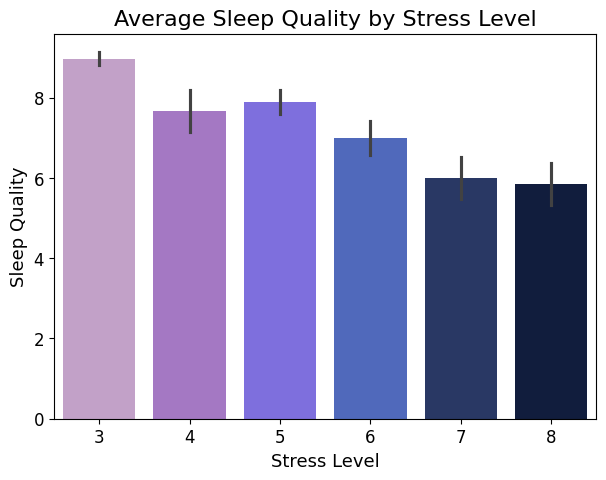

In [49]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=df,
    x="Stress Level",
    y="Quality of Sleep",
    palette=palette_custom,
    errorbar="sd",
    edgecolor="none"
)

plt.title("Average Sleep Quality by Stress Level", fontsize=16)
plt.xlabel("Stress Level", fontsize=13)
plt.ylabel("Sleep Quality", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




Sleep quality drops significantly as stress increases. Low-stress individuals have the highest sleep quality scores.

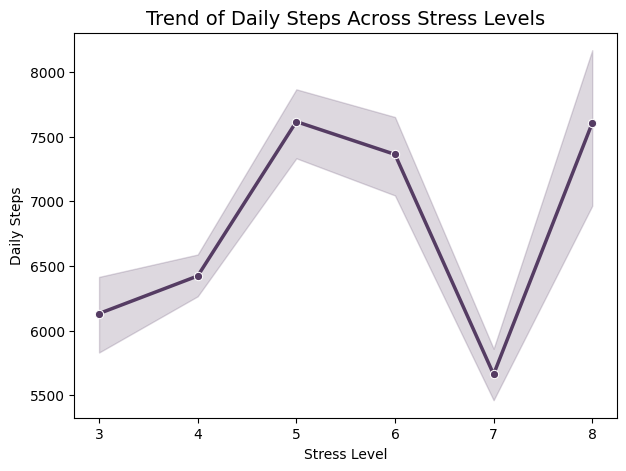

In [50]:
plt.figure(figsize=(7,5))

sns.lineplot(
    data=df,
    x="Stress Level",
    y="Daily Steps",
    marker="o",
    linewidth=2.5,
    color="#553C63"
)

plt.title("Trend of Daily Steps Across Stress Levels", fontsize=14)
plt.xlabel("Stress Level")
plt.ylabel("Daily Steps")
plt.show()




Daily steps show no strong pattern with stress level ❌ Physical activity varies widely across all stress levels.

/tmp/ipython-input-2431445803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


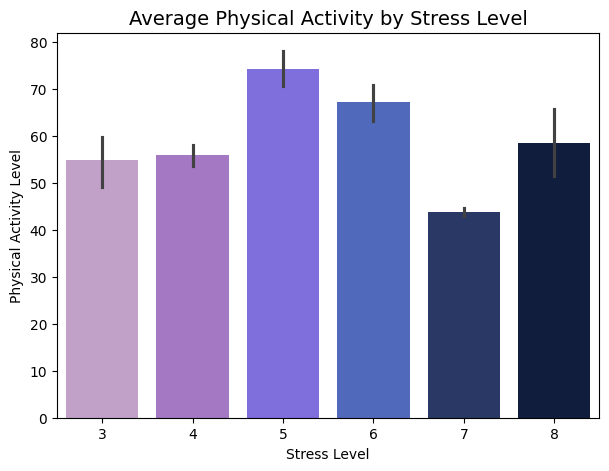

In [51]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=df,
    x="Stress Level",
    y="Physical Activity Level",
    palette=palette_custom
)

plt.title("Average Physical Activity by Stress Level", fontsize=14)
plt.xlabel("Stress Level")
plt.ylabel("Physical Activity Level")
plt.show()



Physical activity has a weak and inconsistent relationship with stress. Moderately stressed individuals show slightly higher activity levels.

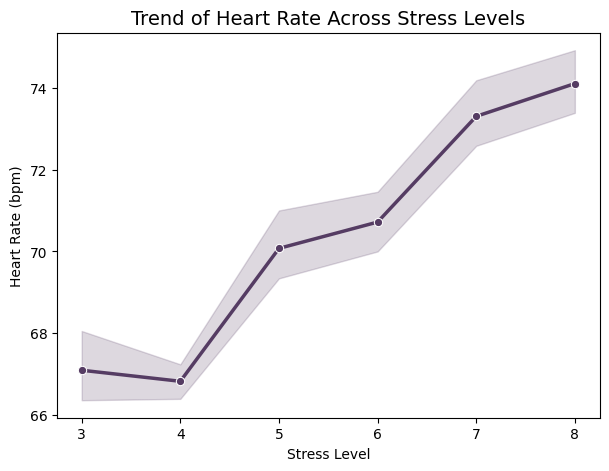

In [52]:
plt.figure(figsize=(7,5))

sns.lineplot(
    data=df,
    x="Stress Level",
    y="Heart Rate",
    marker="o",
    linewidth=2.5,
    color="#553C63"
)

plt.title("Trend of Heart Rate Across Stress Levels", fontsize=14)
plt.xlabel("Stress Level")
plt.ylabel("Heart Rate (bpm)")
plt.show()




Higher stress levels are associated with higher heart rates. Individuals with stress levels 7–8 show noticeably elevated BPM values

In [53]:
def classify_bp(bp):
    systolic, diastolic = bp.split("/")
    systolic = int(systolic)
    diastolic = int(diastolic)

    if systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif (130 <= systolic < 140) or (80 <= diastolic < 90):
        return "High Stage 1"
    else:
        return "High Stage 2"

df["BP_Category_New"] = df["Blood Pressure"].apply(classify_bp)


This function converts blood pressure readings (“120/80”...) into clinical categories—Normal, Elevated, High Stage 1, or High Stage 2—based on standard medical thresholds. It helps transform raw BP values into meaningful labels for analysis.

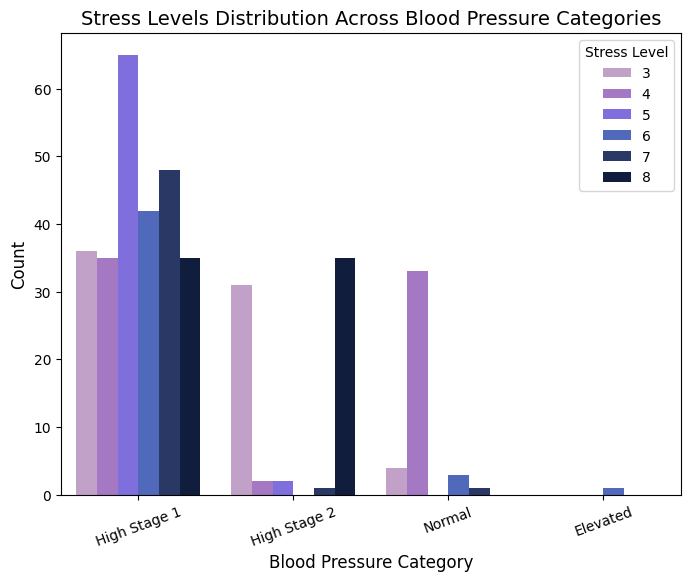

In [54]:
plt.figure(figsize=(8,6))

sns.countplot(
    data=df,
    x="BP_Category_New",
    hue="Stress Level",
    palette=palette_custom
)

plt.title("Stress Levels Distribution Across Blood Pressure Categories", fontsize=14)
plt.xlabel("Blood Pressure Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Stress Level")
plt.show()


People with high blood pressure (High Stage 1 & 2) tend to experience higher stress levels, while those with normal blood pressure usually show lower stress.

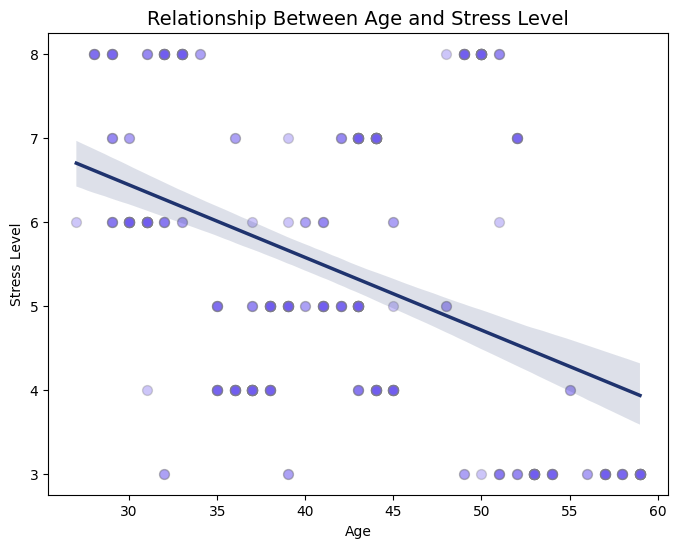

In [55]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="Age",
    y="Stress Level",
    scatter_kws={
        'alpha': 0.35,
        's': 50,
        'edgecolor': 'gray'
    },
    line_kws={
        'color': palette_custom[-2],
        'linewidth': 2.5
    },
    color=palette_custom[2]
)

plt.title("Relationship Between Age and Stress Level", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Stress Level")
plt.show()


Age is negatively correlated with stress level — younger individuals are more stressed than older ones.

/tmp/ipython-input-826925557.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-826925557.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(


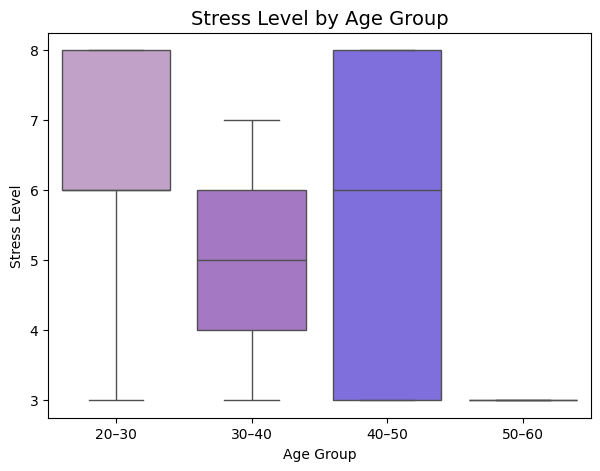

In [56]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[25, 35, 45, 55, 65],
    labels=["20–30", "30–40", "40–50", "50–60"]
)

plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="AgeGroup",
    y="Stress Level",
    palette=palette_custom

)

plt.title("Stress Level by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Stress Level")
plt.show()


/tmp/ipython-input-3602369774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3602369774.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(


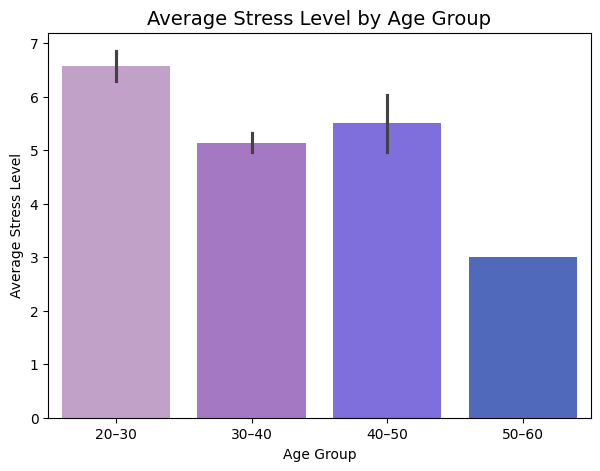

In [57]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="AgeGroup",
    y="Stress Level",
   palette=palette_custom

)

plt.title("Average Stress Level by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Stress Level")
plt.show()



Younger age groups report higher average stress. Stress steadily declines across older age groups.

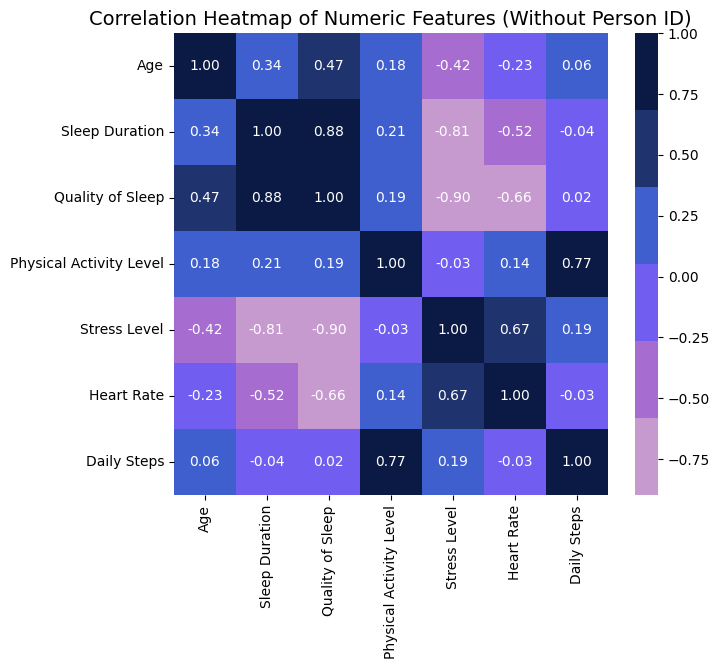

In [58]:
plt.figure(figsize=(7,6))

numeric_cols = df.select_dtypes(include="number").columns.drop("Person ID")

corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap=sns.color_palette(palette_custom, as_cmap=True),
    fmt=".2f"
)

plt.title("Correlation Heatmap of Numeric Features (Without Person ID)", fontsize=14)
plt.show()

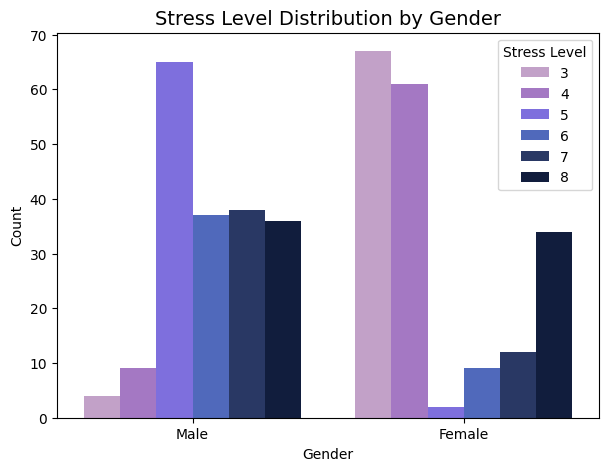

In [59]:
plt.figure(figsize=(7,5))

sns.countplot(
    data=df,
    x="Gender",
    hue="Stress Level",
    palette=palette_custom
)

plt.title("Stress Level Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.show()


/tmp/ipython-input-859343918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


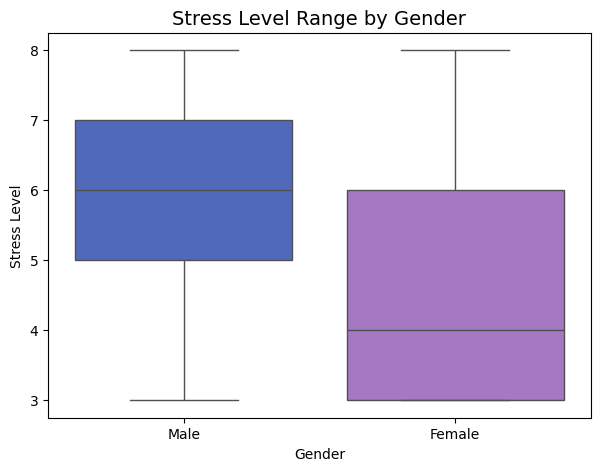

In [60]:
plt.figure(figsize=(7,5))

sns.boxplot(
    data=df,
    x="Gender",
    y="Stress Level",
    palette=["#3E5FCD", "#A66CCF"]
)

plt.title("Stress Level Range by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Stress Level")
plt.show()


/tmp/ipython-input-2616099745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


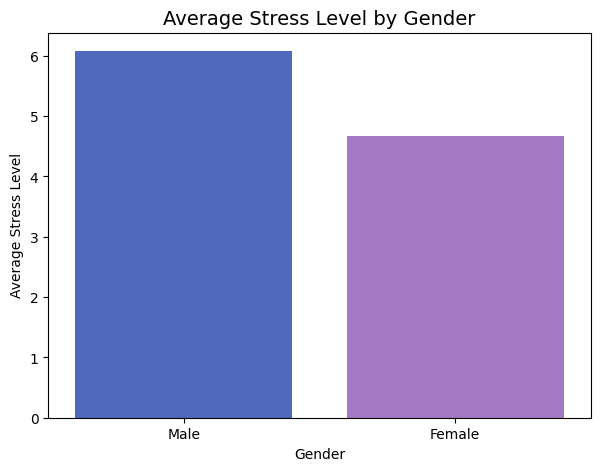

In [61]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=df,
    x="Gender",
    y="Stress Level",
    palette=["#3E5FCD", "#A66CCF"],
    errorbar=None
)

plt.title("Average Stress Level by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Average Stress Level")
plt.show()


/tmp/ipython-input-987836237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-987836237.py:3: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


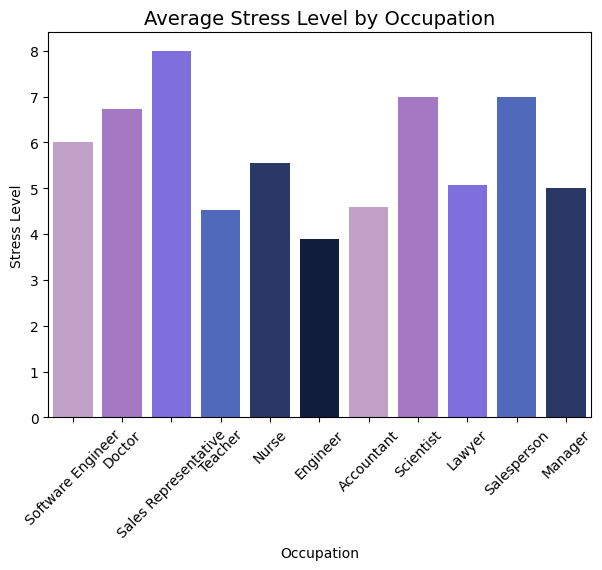

In [62]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=df,
    x="Occupation",
    y="Stress Level",
    errorbar=None,
 palette=palette_custom
    )

plt.title("Average Stress Level by Occupation", fontsize=14)
plt.xlabel("Occupation")
plt.ylabel("Stress Level")
plt.xticks(rotation=45)
plt.show()



Stress levels vary significantly across occupations. Healthcare-related jobs (like doctors and nurses) show higher stress, while technical or office roles (like engineers and accountants) show lower stress.

/tmp/ipython-input-3412277033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3412277033.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(


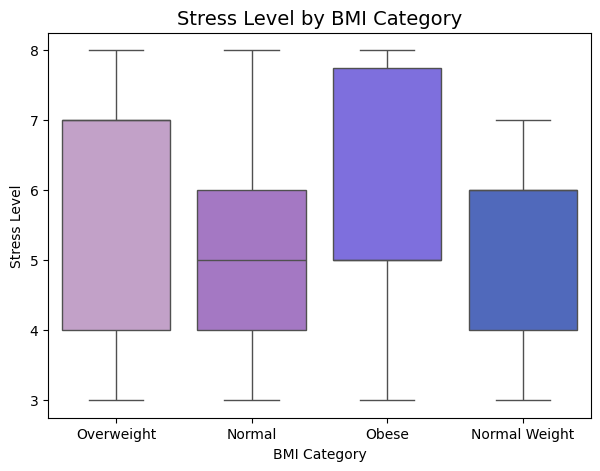

In [63]:
plt.figure(figsize=(7,5))

sns.boxplot(
    data=df,
    x="BMI Category",
    y="Stress Level",
    palette=palette_custom
)

plt.title("Stress Level by BMI Category", fontsize=14)
plt.xlabel("BMI Category")
plt.ylabel("Stress Level")
plt.show()


Stress levels tend to be higher among overweight and obese individuals compared to those with normal BMI.

In [64]:
def classify_stress(level):
    if level <= 4:
        return "Low"
    elif level <= 6:
        return "Medium"
    else:
        return "High"

df["Stress_Class"] = df["Stress Level"].apply(classify_stress)
df["Stress_Class"].value_counts()

,count
Stress_Class,
Low,141
High,120
Medium,113


In [65]:
import matplotlib.pyplot as plt

stress_by_gender = (
    df.groupby(["Gender", "Stress_Class"])
      .size()
      .unstack(fill_value=0)
      .reindex(index=["Male", "Female"], columns=["Low", "Medium", "High"])
)

stress_by_gender


Stress_Class,Low,Medium,High
Gender,,,
Male,13,102,74
Female,128,11,46


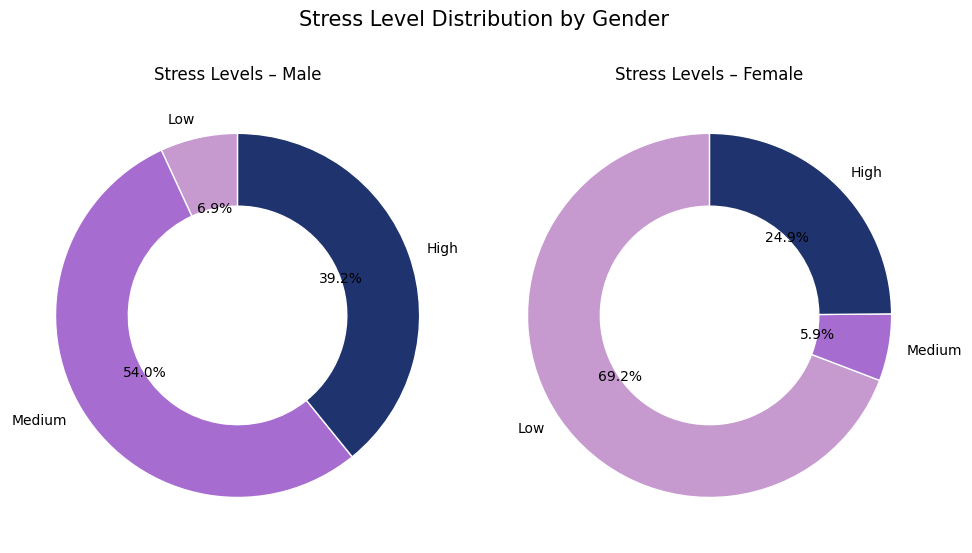

In [66]:
import numpy as np

labels = ["Low", "Medium", "High"]

colors = ["#C69ACF",
    "#A66CCF",
    "#1F336E",
    "#0A1A44"]
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

genders = ["Male", "Female"]

for ax, gender in zip(axes, genders):
    values = stress_by_gender.loc[gender].values

    wedges, texts, autotexts = ax.pie(
        values,
        labels=labels,
        colors=colors,
        autopct="%.1f%%",
        startangle=90,
        wedgeprops={"width": 0.4, "edgecolor": "white"},
        textprops={"fontsize": 10}
    )

    ax.set_title(f"Stress Levels – {gender}", fontsize=12)

plt.suptitle("Stress Level Distribution by Gender", fontsize=15)
plt.tight_layout()
plt.show()


The results show a clear difference in stress levels between males and females. Most males experience Medium or High stress, with very few falling in the Low category. In contrast, the majority of females report Low stress levels, with only a small portion showing Medium or High stress. This indicates that stress is more prevalent among males in this dataset, suggesting possible lifestyle, behavioral, or daily-routine differences between the two groups.

**Lifestyle-Based Clustering**  🔢

In [67]:
features_kmeans = ["Sleep Duration", "Physical Activity Level"]
X_km = df[features_kmeans].copy()

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_km_scaled = scaler.fit_transform(X_km)

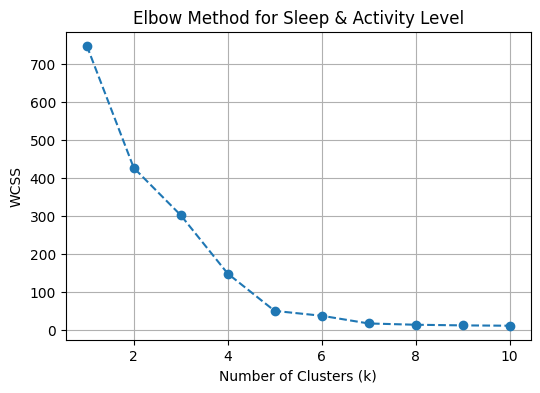

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_km_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Method for Sleep & Activity Level')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The Elbow Method clearly bends around k = 4, suggesting that four clusters are optimal.

In [70]:
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans.fit(X_km_scaled)

df["Lifestyle_Cluster"] = kmeans.labels_
centroids = kmeans.cluster_centers_

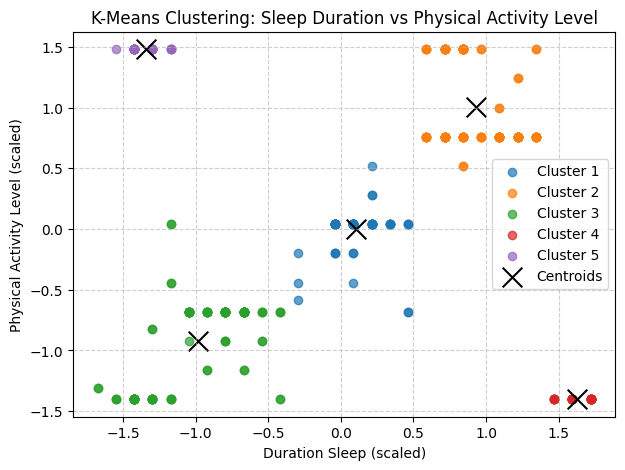

In [71]:
plt.figure(figsize=(7,5))
for i in range(k_opt):
    plt.scatter(
        X_km_scaled[kmeans.labels_ == i, 0],
        X_km_scaled[kmeans.labels_ == i, 1],
        label=f'Cluster {i+1}', alpha=0.7
    )

plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, color='black', marker='x', label='Centroids'
)

plt.xlabel('Duration Sleep (scaled)')
plt.ylabel('Physical Activity Level (scaled)')
plt.title('K-Means Clustering: Sleep Duration vs Physical Activity Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The clusters show clear lifestyle patterns:
People with better sleep and higher activity form a healthy group, while those with poor sleep and low activity cluster together and tend to show higher stress.
This confirms that lifestyle habits naturally separate into meaningful groups.

In [72]:
job_map = {
    "Teacher": 1,
    "Nurse": 1,
    "Doctor": 1,
    "Engineer": 2,
    "Lawyer": 2,
    "Accountant": 2,
    "Sales Representative": 3,
    "Software Engineer": 3,
    "Scientist": 3,
    "Salesperson": 3
}

df["Job_Stress_Level"] = df["Occupation"].map(job_map)

df["Job_Stress_Level"].fillna(2, inplace=True)


/tmp/ipython-input-2035665810.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Job_Stress_Level"].fillna(2, inplace=True)


In [73]:
def classify_stress(level):
    if level <= 4:
        return "Low"
    elif level <= 6:
        return "Medium"
    else:
        return "High"

df["Stress_Class"] = df["Stress Level"].apply(classify_stress)
df["Stress_Class"].value_counts()


,count
Stress_Class,
Low,141
High,120
Medium,113


 I converted the numerical stress levels into a three-tiered classification in order to apply the Logistic Regression Model.

In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = [
    "Age",
    "Gender",
    "Physical Activity Level"
]


X = df[features].copy()
y = df["Stress_Class"]

le_gender = LabelEncoder()
X["Gender"]       = le_gender.fit_transform(X["Gender"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


log_model = LogisticRegression(
    multi_class="ovr",
    max_iter=1000
)
log_model.fit(X_train_scaled, y_train)


y_pred = log_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7610619469026548

Classification Report:

              precision    recall  f1-score   support

        High       0.85      0.47      0.61        36
         Low       0.66      0.91      0.76        43
      Medium       0.88      0.88      0.88        34

    accuracy                           0.76       113
   macro avg       0.80      0.75      0.75       113
weighted avg       0.79      0.76      0.75       113



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [75]:
features = [
    "Age",
    "Gender",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Heart Rate",
    "Job_Stress_Level"
]


X = df[features].copy()
y = df["Stress_Class"]

le_gender = LabelEncoder()
X["Gender"]       = le_gender.fit_transform(X["Gender"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


log_model = LogisticRegression(
    multi_class="ovr",
    max_iter=1000
)
log_model.fit(X_train_scaled, y_train)


y_pred = log_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9469026548672567

Classification Report:

              precision    recall  f1-score   support

        High       0.92      1.00      0.96        36
         Low       1.00      0.93      0.96        43
      Medium       0.91      0.91      0.91        34

    accuracy                           0.95       113
   macro avg       0.94      0.95      0.95       113
weighted avg       0.95      0.95      0.95       113



The Logistic Regression model achieved 94.69% accuracy, showing that the relationship between lifestyle features and stress levels is largely linear.
This indicates that the selected features capture clear patterns that allow even a simple linear model to classify stress effectively.

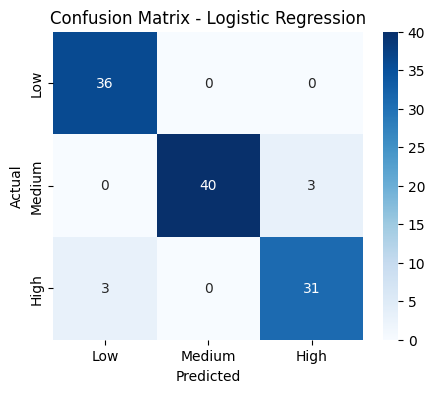

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_log = log_model.predict(X_test_scaled)

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = [
    "Age",
    "Gender",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Heart Rate",
    "Job_Stress_Level"
]

X = df[features].copy()
y = df["Stress_Class"]

le_gender = LabelEncoder()
X["Gender"]  = le_gender.fit_transform(X["Gender"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

svm_model = svm.LinearSVC(C=100, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9734513274336283

Classification Report:

              precision    recall  f1-score   support

        High       0.95      1.00      0.97        36
         Low       1.00      0.98      0.99        43
      Medium       0.97      0.94      0.96        34

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



The SVM model delivered the highest accuracy (97.34%), meaning the stress classes are well separated in the chosen feature space.
This strong performance across accuracy, precision, recall, and F1-score indicates that SVM captures the data structure more effectively than the other models.

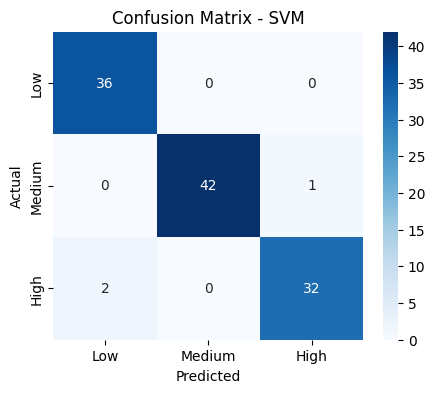

In [78]:
y_pred_svm = svm_model.predict(X_test_scaled)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print("KNN Accuracy (k=3):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_knn = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm_knn)

KNN Accuracy (k=3): 0.9646017699115044

Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.97      0.96        36
         Low       1.00      0.98      0.99        43
      Medium       0.94      0.94      0.94        34

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.97      0.96      0.96       113


Confusion Matrix:
 [[35  0  1]
 [ 0 42  1]
 [ 2  0 32]]


The KNN model achieved 96.46% accuracy, showing that local patterns and neighborhood relationships play an important role in distinguishing stress levels.
Its performance being close to SVM suggests that the dataset contains natural clustering among stress categories.

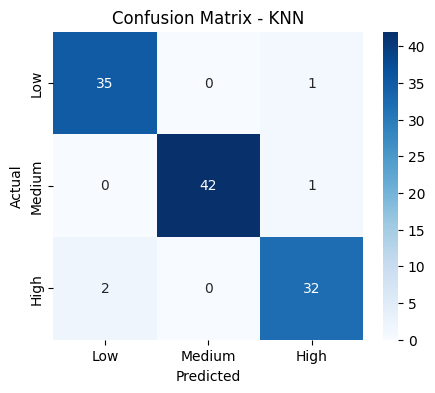

In [80]:
y_pred_knn = knn_model.predict(X_test_scaled)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_knn,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The analysis showed meaningful relationships between lifestyle behaviors and stress.
Among the tested models, SVM achieved the highest accuracy (97.34%), outperforming Logistic Regression and KNN.
The results confirm that machine learning can effectively classify stress levels and support early stress monitoring based on health patterns.